In [28]:
##RECOMMENDATION SYSTEM 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='viridis')
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder

In [13]:
# Load the dataset
df = pd.read_csv(r"C:\Users\durwa\Downloads\recommendation data.csv" )
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [14]:
# Display the first few rows of the dataset
print(df.head())

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  


In [15]:
# Handle missing values
df.fillna('', inplace=True)


In [16]:
# Explore the dataset structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   anime_id  12294 non-null  int64 
 1   name      12294 non-null  object
 2   genre     12294 non-null  object
 3   type      12294 non-null  object
 4   episodes  12294 non-null  object
 5   rating    12294 non-null  object
 6   members   12294 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 672.5+ KB
None


In [17]:
# Combine relevant features into a single string for each anime
df['features'] = df['genre'] + ' ' + df['type']

In [18]:
# Convert categorical features to numerical representations
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['features'])

In [23]:
# Check for non-numeric values in the 'rating' column
non_numeric_ratings = df[~df['rating'].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric_ratings)

       anime_id                                               name  \
8968      34502                                    Inazma Delivery   
9657      34309  Nananin no Ayakashi: Chimi Chimi Mouryou!! Gen...   
10896     34096                                     Gintama (2017)   
10897     34134                                    One Punch Man 2   
10898     30484                                      Steins;Gate 0   
...         ...                                                ...   
12274     34492  Nuki Doki! Tenshi to Akuma no Sakusei Battle -...   
12279     34491                       Sagurare Otome The Animation   
12280     34312                                       Saimin Class   
12282     34388                    Shikkoku no Shaga The Animation   
12285     34399                                   Taimanin Asagi 3   

                                                   genre type episodes rating  \
8968                              Action, Comedy, Sci-Fi   TV       10        

In [24]:
# Convert ratings to numeric, forcing any errors to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Handle NaN values in the 'rating' column (e.g., filling with the mean rating)
df['rating'].fillna(df['rating'].mean(), inplace=True)

In [25]:
# Normalize the average rating
scaler = StandardScaler()
df['normalized_rating'] = scaler.fit_transform(df[['rating']])

In [26]:
# Combine the TF-IDF matrix with normalized ratings
features_matrix = np.hstack((tfidf_matrix.toarray(), df[['normalized_rating']].values))

In [29]:
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(features_matrix, features_matrix)

In [38]:
# Function to get recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the anime that matches the title
    idx = df[df['name'] == title].index[0]
    
    # Get the pairwise similarity scores of all animes with that anime
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the animes based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 10 most similar animes
    sim_scores = sim_scores[1:11]
    
    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 most similar animes
    return df['name'].iloc[anime_indices]

# Example usage
print(get_recommendations('Naruto'))

615                                    Naruto: Shippuuden
486                              Boruto: Naruto the Movie
588                                       Dragon Ball Kai
515                                Dragon Ball Kai (2014)
1343                                          Naruto x UT
1103    Boruto: Naruto the Movie - Naruto ga Hokage ni...
206                                         Dragon Ball Z
1472          Naruto: Shippuuden Movie 4 - The Lost Tower
1573    Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...
346                                           Dragon Ball
Name: name, dtype: object


<Axes: xlabel='count', ylabel='genre'>

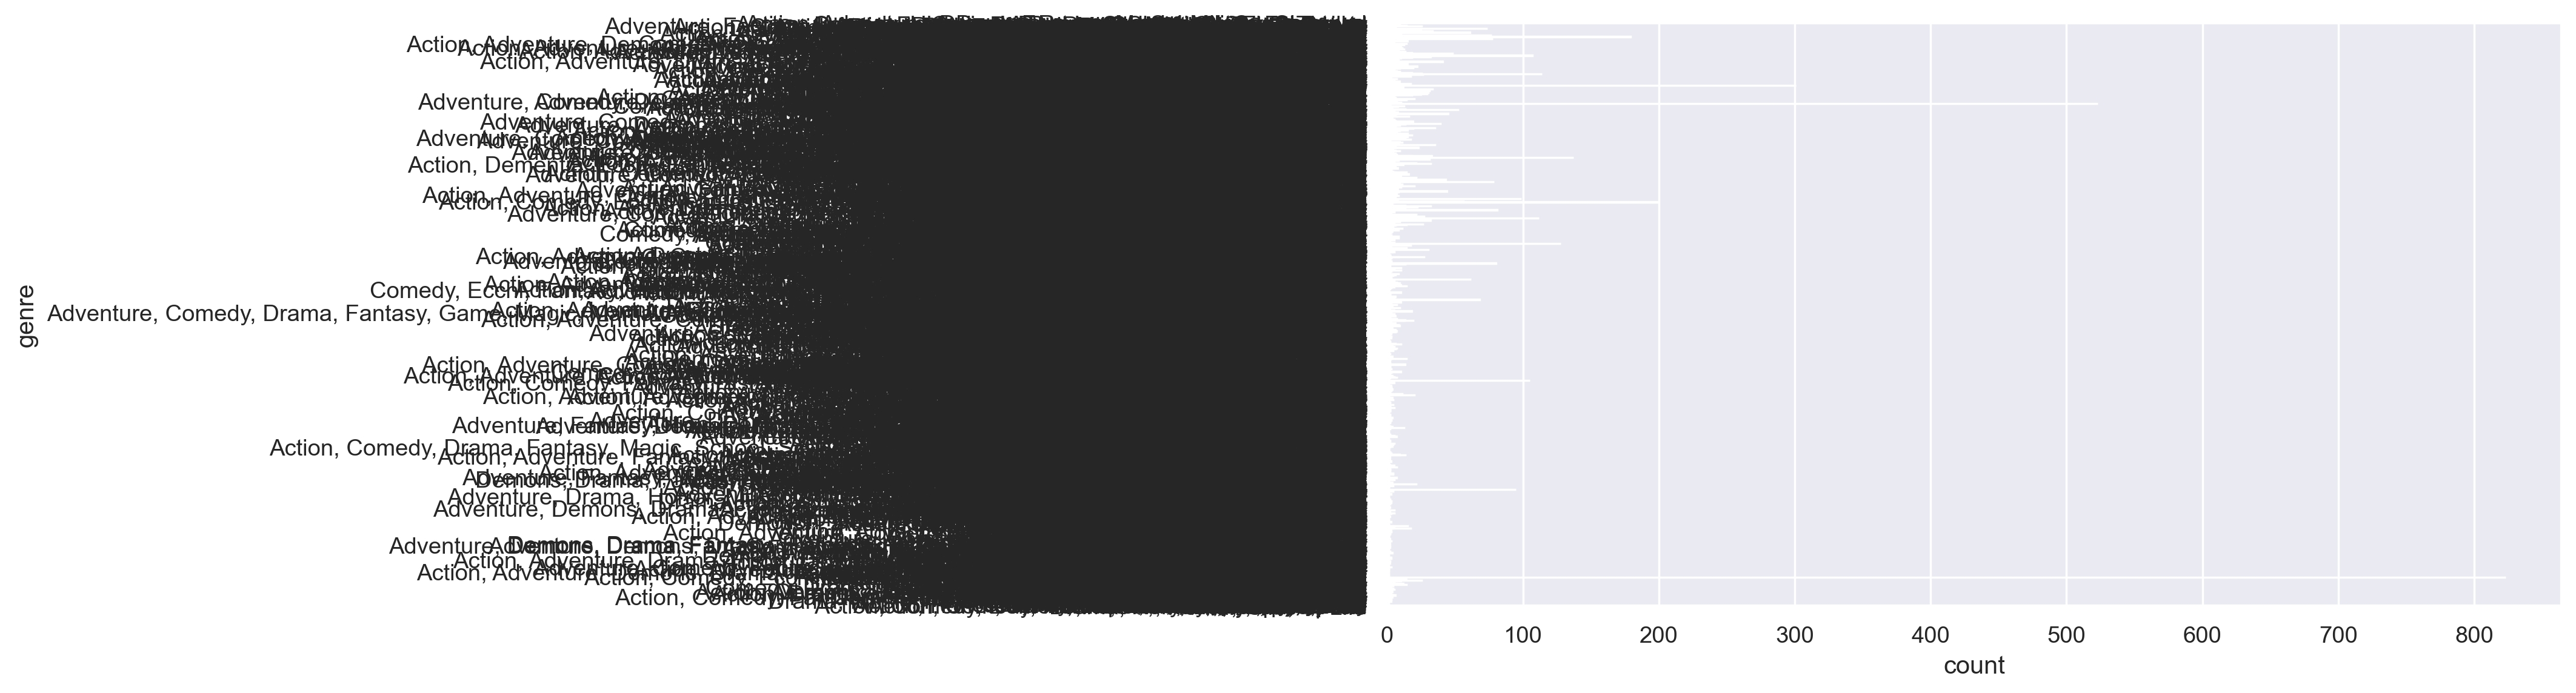

In [39]:
sns.countplot(y = df['genre'])

In [40]:
df['name'].unique()

array(['Kimi no Na wa.', 'Fullmetal Alchemist: Brotherhood', 'Gintama°',
       ..., 'Violence Gekiga David no Hoshi',
       'Violence Gekiga Shin David no Hoshi: Inma Densetsu',
       'Yasuji no Pornorama: Yacchimae!!'], dtype=object)

<Axes: xlabel='count', ylabel='type'>

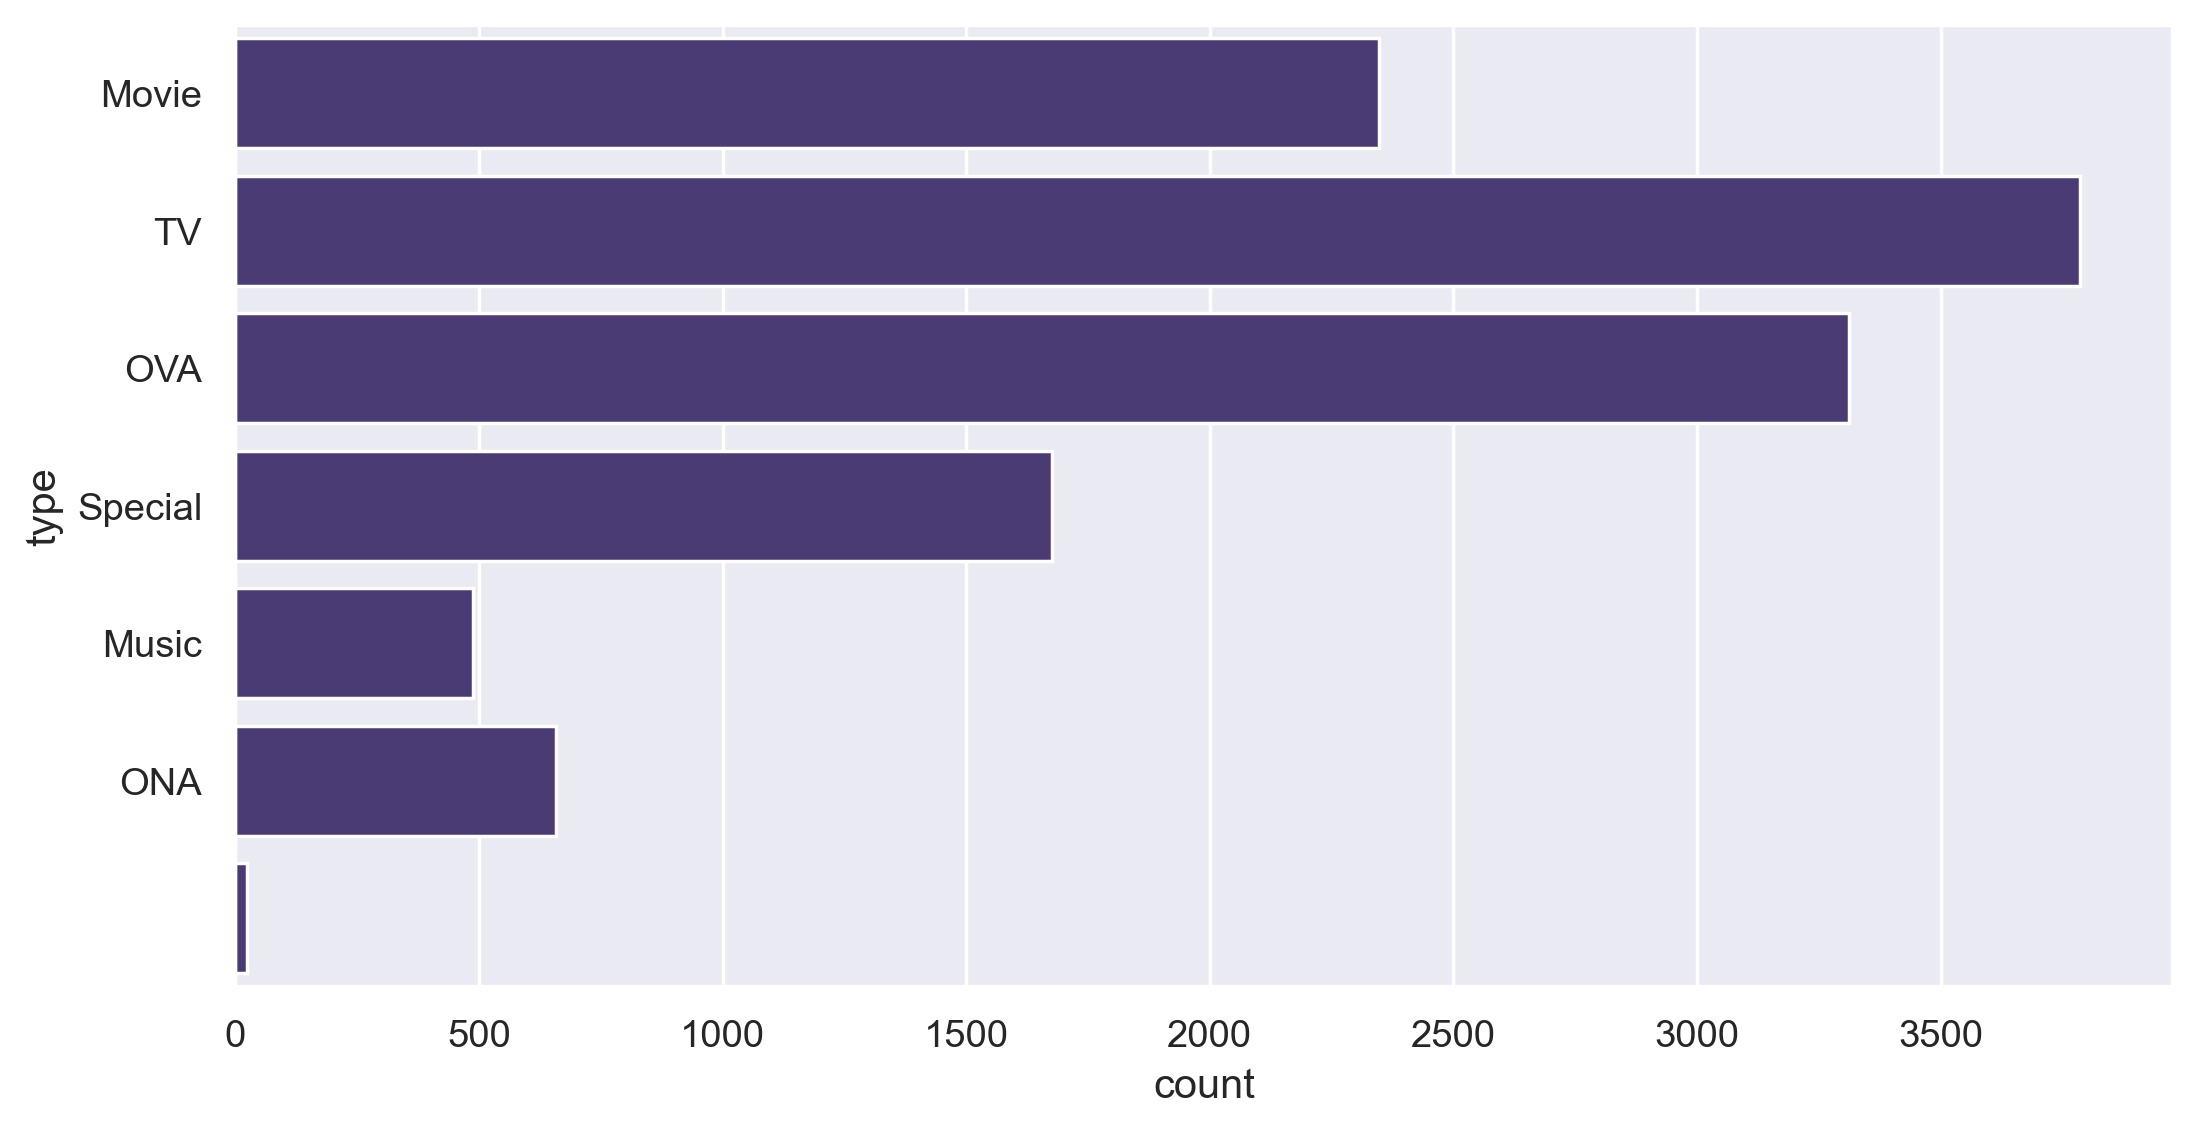

In [41]:
sns.countplot(y = df['type'])

<Axes: xlabel='rating', ylabel='count'>

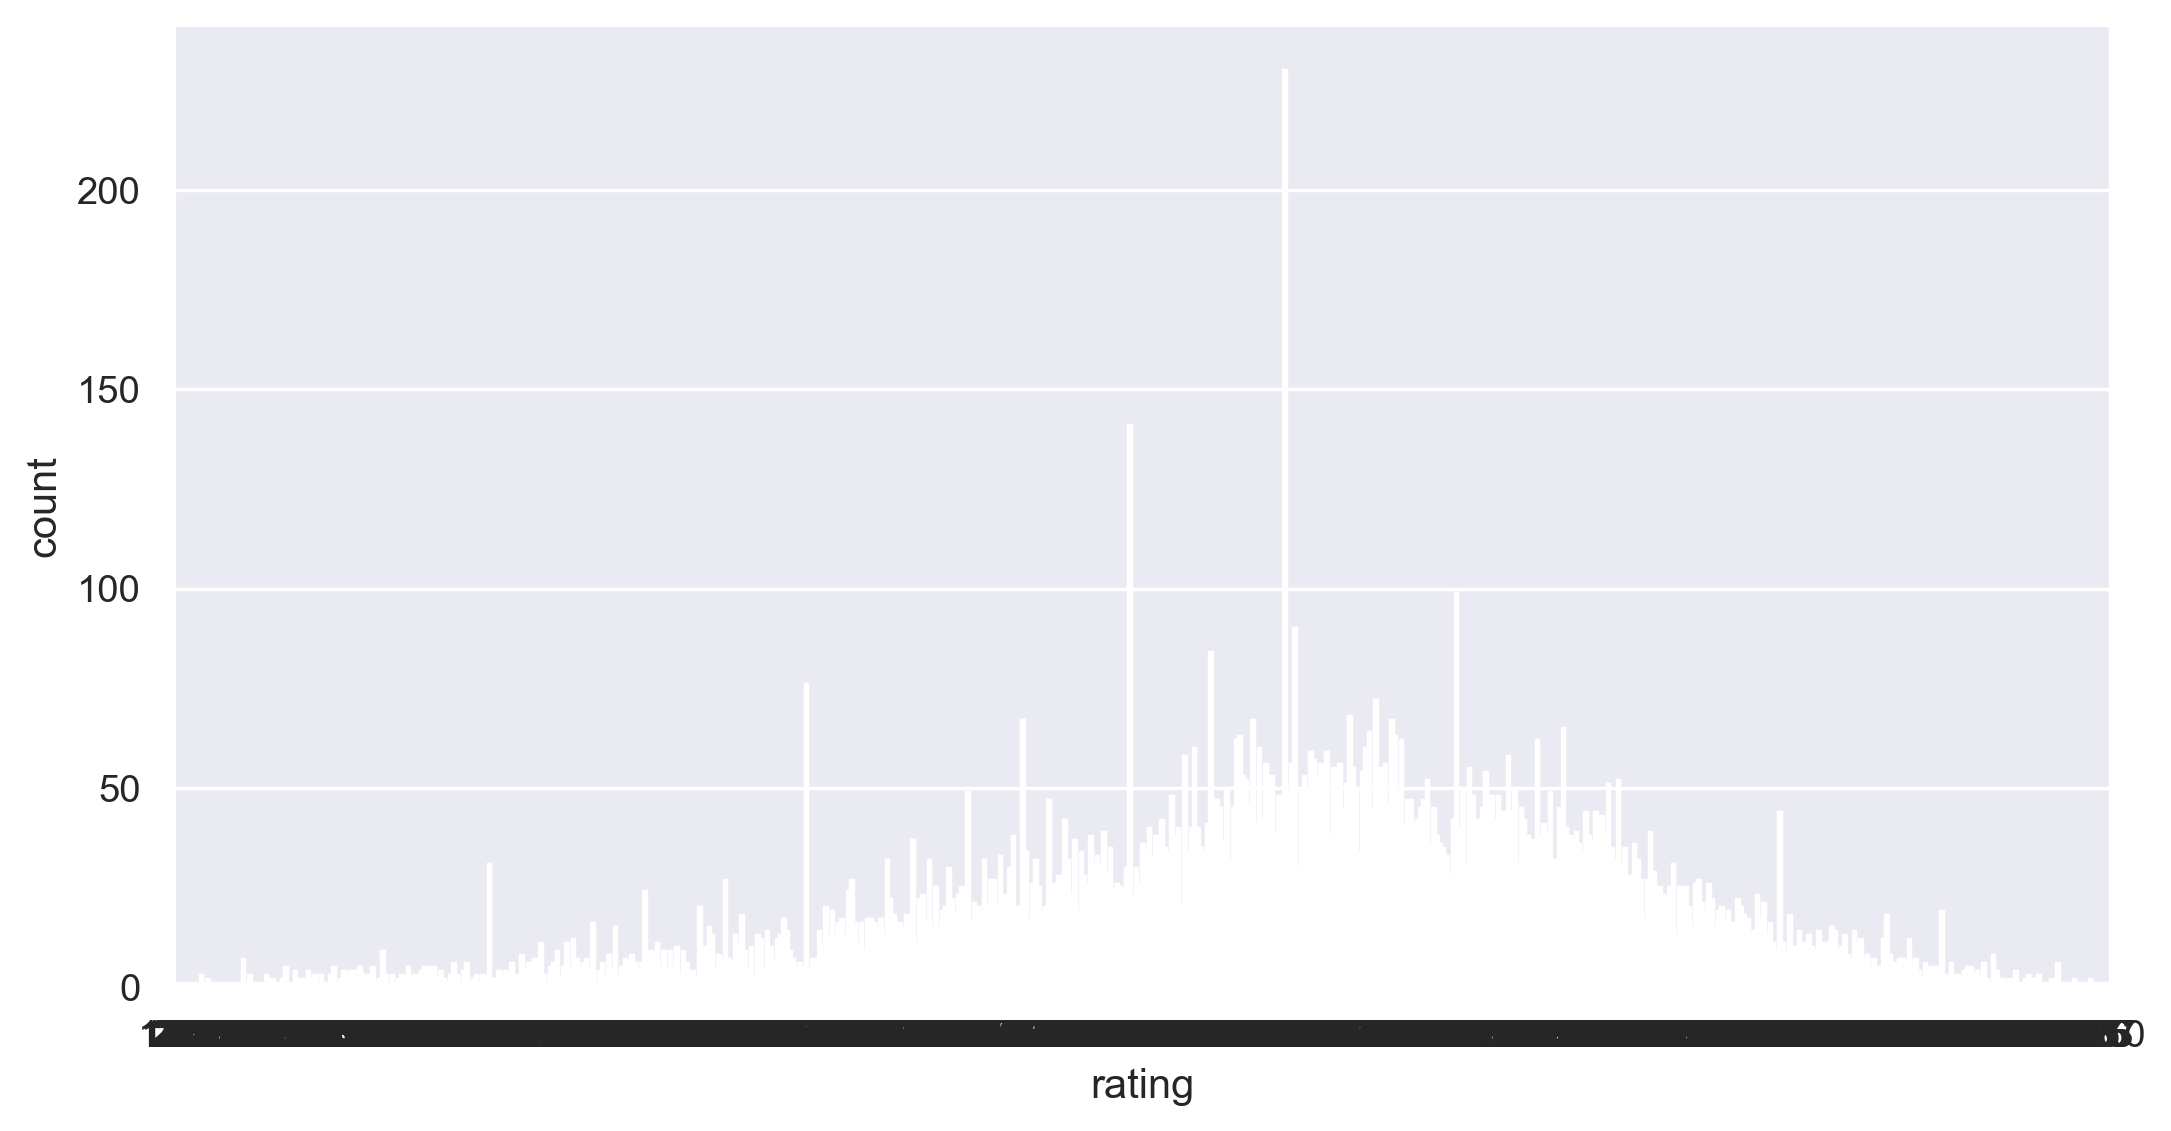

In [42]:
sns.countplot(x = df['rating'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Split the dataset
train, test = train_test_split(df, test_size=0.2, random_state=42)

# This part is a bit tricky since we need user-item interaction data for proper evaluation
# Here we just demonstrate how to use sklearn metrics if we had a binary classification setup

# Assuming binary relevance (1 for relevant, 0 for not relevant)
# Example usage
y_true = [1, 0, 1, 1, 0]  # Example ground truth labels
y_pred = [1, 0, 1, 0, 0]  # Example predicted labels

# Calculate evaluation metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

In [ ]:
Interview Questions:
1. Can you explain the difference between user-based and item-based collaborative filtering?
2. What is collaborative filtering, and how does it work?

In [ ]:
ans: 1)Item based collaborative filtering finds similarity patterns between items and recommends them to users based on the computed information, whilst user based finds similar users and gives them recommendations based on what other people with similar consumption patterns appreciated

In [ ]:
ans:2):Collaborative filtering is a family of algorithms where there are multiple ways to find similar users or items and multiple ways to calculate rating based on ratings of similar users. Depending on the choices you make, you end up with a type of collaborative filtering approach.Collaborative filtering uses a matrix to map user behavior for each item in its system. The system then draws values from this matrix to plot as data points in a vector space. Various metrics then measure the distance between points as a means of calculating user-user and item-item similarity